# Week 8-PSC-questions

## Q1: plot stress-strain curve

A dogbone sample is given below, the key paramters we will use are the gauage length $L$, gauge width $W_c$, sample thickness $T$. See the figure below:

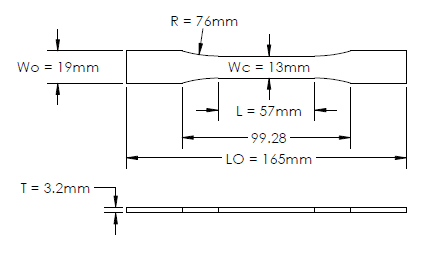

The data is given in a file called "data-Q1.csv", note that the column names are "Extension" and "Load". Now plot stress-strain curve and determine the ultimate tensile strength $\sigma_{UTS}$ (the maximum strength) and the failure strain $\epsilon_s$. 

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### Your code ###



In [ ]:
## Your code##


## Q2: plot the polygon

Define a function to plot polygon with random number $n$ of sides. 

Extra challenge: calculate the total area of the polygon, which is relevant to calculate the stress for a given cross-section shape. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

def polygon(n):

    ## Your code below
    
       
    plt.plot(x,y)
    plt.axis('equal')
    
    
    ## Your code to calculate the total area
    Area=
    return Area 
    
interactive_plot = interactive(polygon , n= (3,20))
interactive_plot 

In [ ]:
## Now call the function Polygon(n)
# n = enter the no. of sides greater than 2: '))
polygon(5)

# Q3. Use numerical integration to calculate the second moment of area

The second moment of area (also known as area moment of inertia) is a geometrical property of an area which reflects how its points are distributed with regard to an arbitrary axis. 

Consider a rectangle with base b and height h whose centroid is located at the origin. $I_{x}$ represents the second moment of area with respect to the x-axis; $I_{y}$ represents the second moment of area with respect to the y-axis; Here $h=3$ mm and $b=9$ mm.Now calculate the 2nd moment of area $I_{x}$.

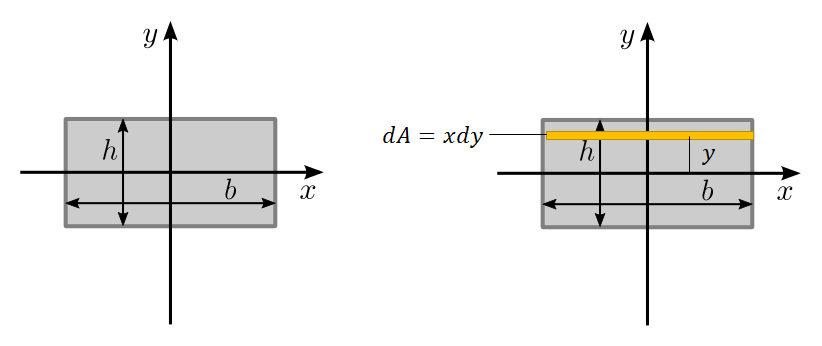

The key point here is to determine the area of a small elment $dA$, $dA=xdy$ for $I_{x}$, while $dA=ydx$ for $I_{y}$

### Use the integration rule to derive it analytically 

For $I_x$, $dA=xdy=bdy$, as the width is constant if the small element is moving along the y axis 

$I_{x}=\iint \limits _{R}y^{2}\,\mathrm {d} A=\int _{-{\frac {b}{2}}}^{\frac {b}{2}}(\int _{-{\frac {h}{2}}}^{\frac {h}{2}}y^{2}\,\mathrm {d} y)\,\mathrm {d} x={\frac {bh^{3}}{12}} $

###  Use numerical integration function to calculate it numerically

For example, after simplification, we can use integration program to do it here for 

$I_{x}=\iint \limits _{R}y^{2}\,\mathrm {d} A=\int _{-{\frac {b}{2}}}^{\frac {b}{2}}(\int _{-{\frac {h}{2}}}^{\frac {h}{2}}y^{2}\,\mathrm {d} y)\,\mathrm {d} x=b(\int _{-{\frac {h}{2}}}^{\frac {h}{2}}y^{2}\,\mathrm {d} y)\,\mathrm {d} x $

In [ ]:
# Define the parameters, type your values here
N= 100 #  The number of intervals in the numerical integration (the more, the more accurate)
##Parameter
def Integrate (N, a, b):
    def f(x):
        # type your function after return
        ## Your code here
        ### Begin code ####
        ### f=  here, this should be your function
        f=
        ### End code *****
        return f # Here this is a linear function, try square function later, you can put your function here
    value=0  # initial value
    TotalArea=0 # initial value
    for n in range(1, N+1): # Here range to N+1, not N
        x_bar = 
        value =  # sum up all thea values
    TotalArea=   # Approxiamted area
    return TotalArea    

In [ ]:
# Define the parameters
b=
h=

# Now call the function to calculate the 2nd moment of area against x axis
I_x=
print(I_x)

### Extra challenge: Design a program to determine the Young's Modulus and 0.2% offset Yield strength automatically? 

Hints: 

(1) Find the data range that covers the linear elastic part of the stress-strain curve, Pandas has this nice little method .between(). We can set lower and upper limits from the stress series and then use this to index out of both the stress and the strain series in the linear elastic region. For example: E_stress = stress[stress.between(a,b)], $a$ and $b$ is the lower and upper bound, which will be defined by you. 

(2) Then, you can use the scipy's linear regression function called **stats.linregress()** to calculate the slope in the linear elastic region. The slope will be the Young's moduls $E$.  

(3) Now to determine the 0.2% offset yield strength, we will add a 0.002 or 0.2 % offset line to our plot. We will create a new linear series using the general form:

$$ y = mx + b $$
$y$ will be the $\sigma$ value, $x$ will be the offset strain values ($\epsilon - 0.002$), $m$ (the slope) is the elastic modulus $E$, and $b$ is the y-intercept. Adapting $y = mx + b$ to our 0.002 offset line looks like the equation below.

$$ \sigma_{offset} = E (\epsilon - 0.002) + 0 $$
We can code $\sigma_{offset}$ line into a new series based on the equation above. 

Now that the stress_offset series is defined, we can add our stress_offset line to the plot. When we call the plt.plot() command, we will pass in two x-y pairs. The first x-y pair is strain_Al, stress_Al, the second x-y pair is strain_Al, stress_offset.

Then you need to find the intersection point bewteen the original stress-strain curve and the elastic offset-line. We can use the a library "shapely" to find the intersection. 



In [ ]:
# Install the shapely library
# Python has a specific module called Shapely for doing various geometric operations

!pip install shapely

from shapely.geometry import LineString

###  Make sure you finish the above part before moving to this one

In [ ]:
# You will need to import the stress-strain curve in the previous box

# The code below will not work until you have defined all the variables!

# Find the offset stress-strain curve

Modulus= 1000 # MPa, Change this, this should be value you found from the slope of the elastic curve

offset = 0.2/100

sigma_offset = modulus*(strain - offset)


# Example code to use shapely library
# calculating the offset stress

line_1=LineString(np.column_stack((stress, strain))) # Original stress-strain curve
line_2=LineString(np.column_stack((sigma_offset, strain))) # Offset curve

intersection=line_1.intersection(line_2)

x,y =intersection.xy

print(x,y)